# Plot Frame Headers

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from miniscope_io.io import SDCard
from miniscope_io.formats import WireFreeSDLayout_Battery
from miniscope_io.data import Frames
from miniscope_io.plots.headers import plot_headers, battery_voltage

In [2]:
# for the sake of a running example, use the truncated data in the repo.
# the saved plots won't match this since they are generated from the full ~500MB recording
# which we don't want to put in the repository because big.
drive = Path('..') / 'data' / 'wirefree_battery_sample.img'

In [3]:
# Recall that you have to use an SDCard layout that matches the data you have!
# Here we are using an updated layout that includes the battery level
sd = SDCard(drive=drive, layout = WireFreeSDLayout_Battery)

Read all frames, storing header information!

In [4]:
frames = []
with sd:
    while True:
        try:
            frames.append(sd.read(return_header=True))
        except StopIteration:
            break

Create a `Frames` object to get a dataframe of the headers

In [5]:
frames = Frames(frames=frames)
headers = frames.to_df(what='headers')

## Plotting

Now we can just plot the whole dataframe if we want to

<Axes: xlabel='timestamp'>

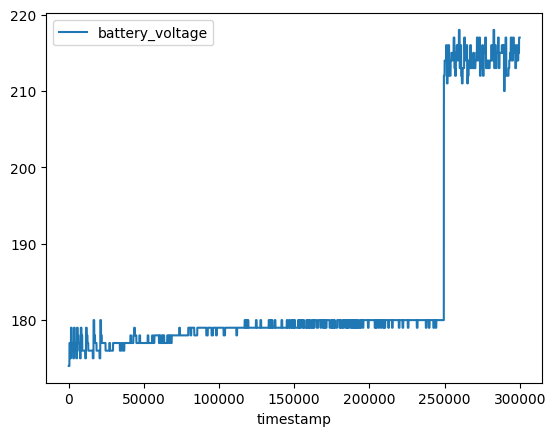

In [6]:
%matplotlib inline
headers.plot('timestamp', 'battery_voltage')

Or we can use a built in plot type

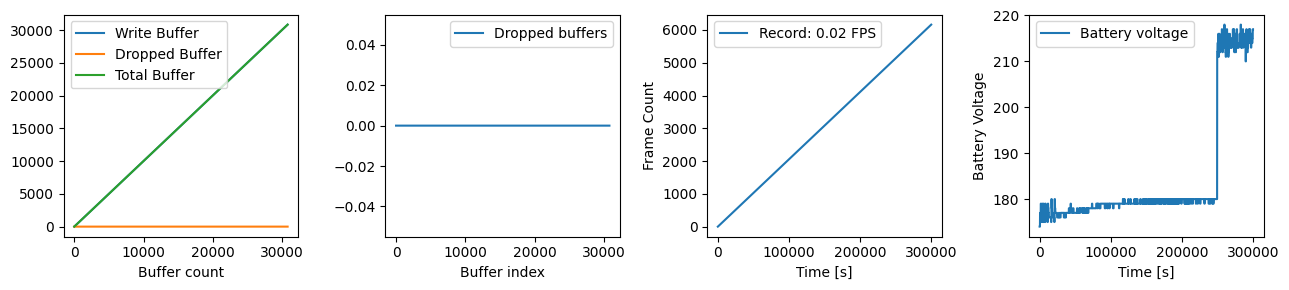

In [7]:
%matplotlib inline
header_fig, header_ax = plot_headers(headers)
header_fig.tight_layout()

Or we can use just a specific subplot

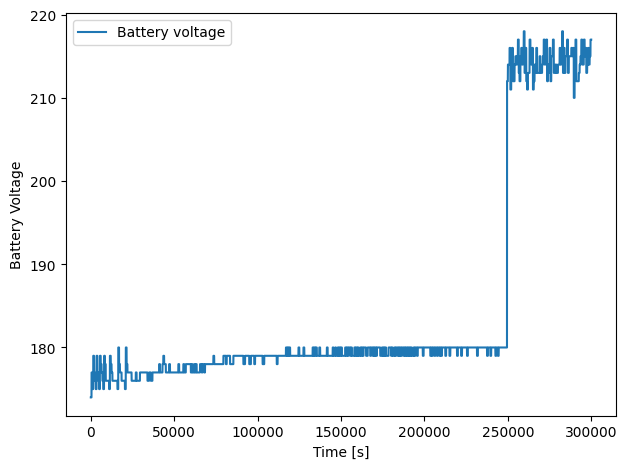

In [8]:
%matplotlib inline
fig, ax = plt.subplots(1,1)
ax = battery_voltage(headers, ax)
fig.tight_layout()

Or, since idk the data is formatted nicely we can just use matplotlib directly...

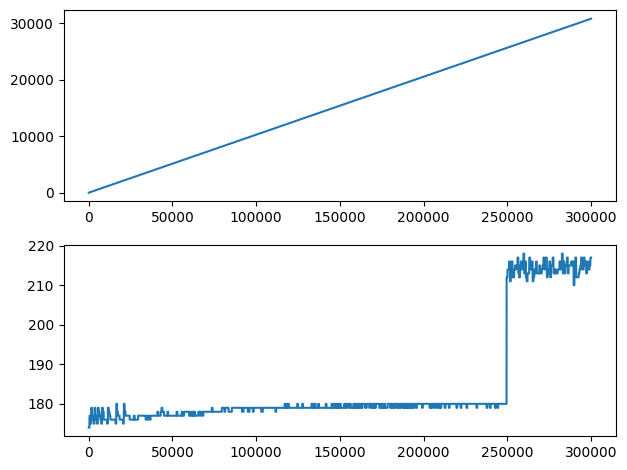

In [9]:
%matplotlib inline
fig, ax = plt.subplots(2)
ax[0].plot(headers.timestamp, headers.buffer_count)
ax[1].plot(headers.timestamp, headers.battery_voltage)
fig.tight_layout()